In [1]:
import glob
import yaml
import os

from yaml import FullLoader

### Load the config file

In [2]:
# Open the config file
with open("../config_inference.yaml") as f:
    cfg = yaml.load(f, Loader=FullLoader)

In [3]:
path_json_detection = "../assets/demo_data/detections/json/ecoVAD"
path_parsed_json = "../assets/demo_data/detections/parsed_json/parsed_json.csv"

### Parsing the `.json` detection files

We parse the `.json` file detection to get a dataframe with detections, time of detection and other information that can then be used for displaying the results. When using `parse_json.py` make sure that the filename is in the *YMD_HMS.wav* format

In the following, we only use the parsed results from ecoVAD detections.

In [4]:
from utils.parse_json import get_df

# Get all the files in the input folder
list_files = glob.glob(os.sep.join([path_json_detection, "**/*.json"]), recursive=True)

# Get the DF as a csv
get_df(list_files, path_parsed_json)

### Plotting the number of detections through time

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import datetime as dt


df_detection = pd.read_csv(path_parsed_json)
df_detection["date"] = pd.to_datetime(df_detection["date"])
df_detection["detections"] = 1

df_aggregated = df_detection.groupby([pd.Grouper(key='date', freq='MIN')]).sum()

Text(0, 0.5, 'Number of detections')

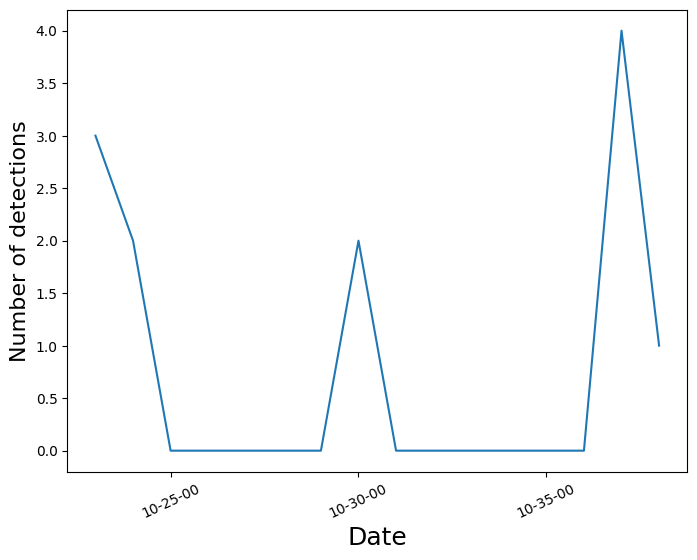

In [6]:
# Data formater
formatter = mdates.DateFormatter("%H-%M-%S")

# Figure base
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(df_aggregated.index, df_aggregated['detections'])

# x axis
ax.xaxis.set_major_formatter(formatter)
plt.xticks(rotation=25)
plt.xlabel('Date', fontsize=18)

# y axis
plt.ylabel('Number of detections', fontsize=16)
